In [36]:
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [37]:
# アヤメデータの読み込み --- (*1)
iris_data = pd.read_csv("iris.csv", encoding="utf-8")

# アヤメデータをラベルと入力データに分離する
y_labels = iris_data.loc[:,"Name"]
x_data = iris_data.loc[:,
    ["SepalLength","SepalWidth","PetalLength","PetalWidth"]]

# ラベルデータをone-hotベクトルに直す
labels = {
    'Iris-setosa': [1, 0, 0], 
    'Iris-versicolor': [0, 1, 0], 
    'Iris-virginica': [0, 0, 1]
}
y_nums = np.array(list(map(lambda v : labels[v] , y_labels)))
x_data = np.array(x_data)


In [38]:
# 学習用とテスト用に分割する --- (*2)
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_nums, train_size=0.8)


In [39]:
# モデル構造を定義 --- (*3)

import tensorflow as tf
import tensorflow.keras as keras
Dense = keras.layers.Dense


In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
plt.figure(figsize=(10,6),dpi=200)
plt.rcParams['figure.figsize'] = (10 ,6)

def fit(epochs):
    # モデルの構造を定義
    model = keras.models.Sequential()
    model.add(Dense(10, activation='relu', input_shape=(4,)))
    model.add(Dense(3, activation='softmax'))
    # モデルを構築
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy'])
    # 学習を実行
    result = model.fit(x_train, y_train,
        batch_size=20,
        epochs=epochs)
    # モデルを評価
    score = model.evaluate(x_test, y_test, verbose=1)
    print('正解率=', score[1], 'loss=', score[0])
    # グラフを描画
    plt.plot(range(1, epochs+1), result.history['accuracy'], label="training")
    plt.plot(range(1, epochs+1), result.history['loss'], label="loss")
    plt.xlabel('Epochs=' + str(epochs))
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    


<Figure size 2000x1200 with 0 Axes>

Train on 120 samples
Epoch 1/10
120/120 [==============================] - 0s 2ms/sample - loss: 2.0303 - accuracy: 0.3167
Epoch 2/10
120/120 [==============================] - 0s 248us/sample - loss: 1.9339 - accuracy: 0.3167
Epoch 3/10
120/120 [==============================] - 0s 161us/sample - loss: 1.8416 - accuracy: 0.3167
Epoch 4/10
120/120 [==============================] - 0s 239us/sample - loss: 1.7647 - accuracy: 0.3250
Epoch 5/10
120/120 [==============================] - 0s 183us/sample - loss: 1.6839 - accuracy: 0.4000
Epoch 6/10
120/120 [==============================] - 0s 276us/sample - loss: 1.6094 - accuracy: 0.4500
Epoch 7/10
120/120 [==============================] - 0s 289us/sample - loss: 1.5361 - accuracy: 0.4333
Epoch 8/10
120/120 [==============================] - 0s 212us/sample - loss: 1.4663 - accuracy: 0.4333
Epoch 9/10
120/120 [==============================] - 0s 294us/sample - loss: 1.3902 - accuracy: 0.4000
Epoch 10/10
30/30 [==========================

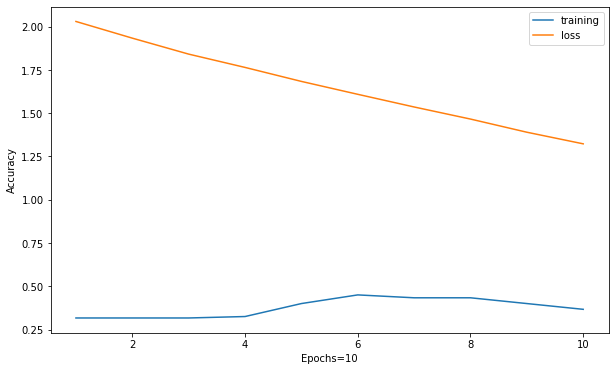

In [92]:
fit(10)

Train on 120 samples
Epoch 1/100
120/120 [==============================] - 0s 2ms/sample - loss: 2.8806 - accuracy: 0.3333
Epoch 2/100
120/120 [==============================] - 0s 153us/sample - loss: 2.7310 - accuracy: 0.3333
Epoch 3/100
120/120 [==============================] - 0s 197us/sample - loss: 2.5873 - accuracy: 0.3333
Epoch 4/100
120/120 [==============================] - 0s 224us/sample - loss: 2.4402 - accuracy: 0.3333
Epoch 5/100
120/120 [==============================] - 0s 206us/sample - loss: 2.3103 - accuracy: 0.3333
Epoch 6/100
120/120 [==============================] - 0s 227us/sample - loss: 2.1911 - accuracy: 0.3333
Epoch 7/100
120/120 [==============================] - 0s 263us/sample - loss: 2.0820 - accuracy: 0.3333
Epoch 8/100
120/120 [==============================] - 0s 247us/sample - loss: 1.9756 - accuracy: 0.3333
Epoch 9/100
120/120 [==============================] - 0s 236us/sample - loss: 1.8840 - accuracy: 0.3333
Epoch 10/100
120/120 [==============

120/120 [==============================] - 0s 203us/sample - loss: 0.9210 - accuracy: 0.6750
Epoch 79/100
120/120 [==============================] - 0s 207us/sample - loss: 0.9183 - accuracy: 0.6750
Epoch 80/100
120/120 [==============================] - 0s 249us/sample - loss: 0.9150 - accuracy: 0.6750
Epoch 81/100
120/120 [==============================] - 0s 199us/sample - loss: 0.9117 - accuracy: 0.6750
Epoch 82/100
120/120 [==============================] - 0s 181us/sample - loss: 0.9084 - accuracy: 0.6750
Epoch 83/100
120/120 [==============================] - 0s 188us/sample - loss: 0.9051 - accuracy: 0.6750
Epoch 84/100
120/120 [==============================] - 0s 164us/sample - loss: 0.9018 - accuracy: 0.6833
Epoch 85/100
120/120 [==============================] - 0s 170us/sample - loss: 0.8985 - accuracy: 0.6833
Epoch 86/100
120/120 [==============================] - 0s 162us/sample - loss: 0.8954 - accuracy: 0.6917
Epoch 87/100
120/120 [==============================] - 0s 

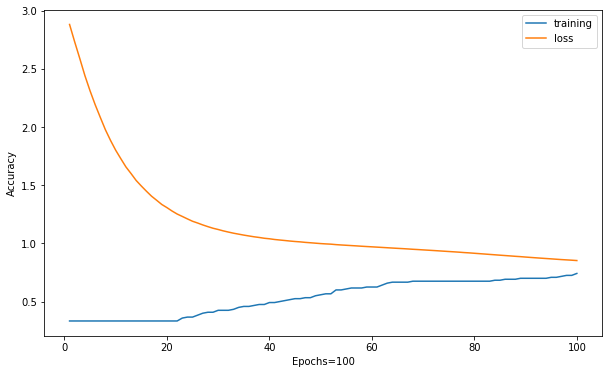

In [93]:
fit(100)

Train on 120 samples
Epoch 1/300
120/120 [==============================] - 0s 2ms/sample - loss: 1.1095 - accuracy: 0.3250
Epoch 2/300
120/120 [==============================] - 0s 122us/sample - loss: 1.1068 - accuracy: 0.3250
Epoch 3/300
120/120 [==============================] - 0s 205us/sample - loss: 1.1048 - accuracy: 0.3250
Epoch 4/300
120/120 [==============================] - 0s 182us/sample - loss: 1.1019 - accuracy: 0.3667
Epoch 5/300
120/120 [==============================] - 0s 288us/sample - loss: 1.0985 - accuracy: 0.4000
Epoch 6/300
120/120 [==============================] - 0s 151us/sample - loss: 1.0922 - accuracy: 0.4667
Epoch 7/300
120/120 [==============================] - 0s 182us/sample - loss: 1.0844 - accuracy: 0.5333
Epoch 8/300
120/120 [==============================] - 0s 260us/sample - loss: 1.0735 - accuracy: 0.5917
Epoch 9/300
120/120 [==============================] - 0s 229us/sample - loss: 1.0629 - accuracy: 0.6333
Epoch 10/300
120/120 [==============

120/120 [==============================] - 0s 212us/sample - loss: 0.5228 - accuracy: 0.9250
Epoch 78/300
120/120 [==============================] - 0s 212us/sample - loss: 0.5180 - accuracy: 0.9333
Epoch 79/300
120/120 [==============================] - 0s 199us/sample - loss: 0.5133 - accuracy: 0.9333
Epoch 80/300
120/120 [==============================] - 0s 199us/sample - loss: 0.5085 - accuracy: 0.9417
Epoch 81/300
120/120 [==============================] - 0s 171us/sample - loss: 0.5041 - accuracy: 0.9500
Epoch 82/300
120/120 [==============================] - 0s 142us/sample - loss: 0.4994 - accuracy: 0.9500
Epoch 83/300
120/120 [==============================] - 0s 196us/sample - loss: 0.4950 - accuracy: 0.9500
Epoch 84/300
120/120 [==============================] - 0s 190us/sample - loss: 0.4908 - accuracy: 0.9583
Epoch 85/300
120/120 [==============================] - 0s 147us/sample - loss: 0.4865 - accuracy: 0.9583
Epoch 86/300
120/120 [==============================] - 0s 

120/120 [==============================] - 0s 201us/sample - loss: 0.3042 - accuracy: 0.9667
Epoch 154/300
120/120 [==============================] - 0s 235us/sample - loss: 0.3024 - accuracy: 0.9667
Epoch 155/300
120/120 [==============================] - 0s 133us/sample - loss: 0.3010 - accuracy: 0.9667
Epoch 156/300
120/120 [==============================] - 0s 181us/sample - loss: 0.2990 - accuracy: 0.9667
Epoch 157/300
120/120 [==============================] - 0s 173us/sample - loss: 0.2973 - accuracy: 0.9667
Epoch 158/300
120/120 [==============================] - 0s 201us/sample - loss: 0.2953 - accuracy: 0.9667
Epoch 159/300
120/120 [==============================] - 0s 159us/sample - loss: 0.2939 - accuracy: 0.9667
Epoch 160/300
120/120 [==============================] - 0s 162us/sample - loss: 0.2924 - accuracy: 0.9667
Epoch 161/300
120/120 [==============================] - 0s 125us/sample - loss: 0.2903 - accuracy: 0.9667
Epoch 162/300
120/120 [============================

120/120 [==============================] - 0s 289us/sample - loss: 0.2037 - accuracy: 0.9667
Epoch 230/300
120/120 [==============================] - 0s 181us/sample - loss: 0.2027 - accuracy: 0.9667
Epoch 231/300
120/120 [==============================] - 0s 172us/sample - loss: 0.2020 - accuracy: 0.9667
Epoch 232/300
120/120 [==============================] - 0s 153us/sample - loss: 0.2010 - accuracy: 0.9667
Epoch 233/300
120/120 [==============================] - 0s 181us/sample - loss: 0.2000 - accuracy: 0.9667
Epoch 234/300
120/120 [==============================] - 0s 193us/sample - loss: 0.1994 - accuracy: 0.9667
Epoch 235/300
120/120 [==============================] - 0s 179us/sample - loss: 0.1986 - accuracy: 0.9667
Epoch 236/300
120/120 [==============================] - 0s 180us/sample - loss: 0.1974 - accuracy: 0.9667
Epoch 237/300
120/120 [==============================] - 0s 179us/sample - loss: 0.1965 - accuracy: 0.9667
Epoch 238/300
120/120 [============================

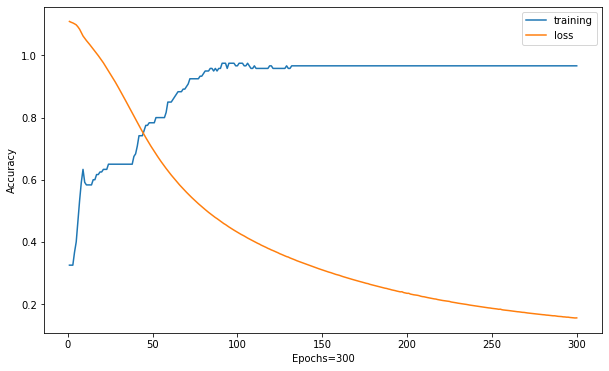

In [94]:
fit(300)